## **Product Prediction**

**<span style="color: blue;">Business Understanding</span>**


Train a machine learning model to predict the `product category` based on the other features.

**<span style="color: blue;">Data Understanding</span>**

**Importation of all necessary packages**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Data Importation**

In [2]:
# Read the dataset into a DataFrame
df = pd.read_csv("dollar_tree_2.csv")

# Display the first few rows of the DataFrame to inspect the data
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


**Exploratory Data Analysis (EDA)**

In [3]:
# Display basic information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [4]:
# Display summary statistics for numerical columns
df.describe()

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [5]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['number'])

In [6]:
# Calculate correlation matrix for numerical columns
correlation_matrix = numeric_df.corr()
correlation_matrix

,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


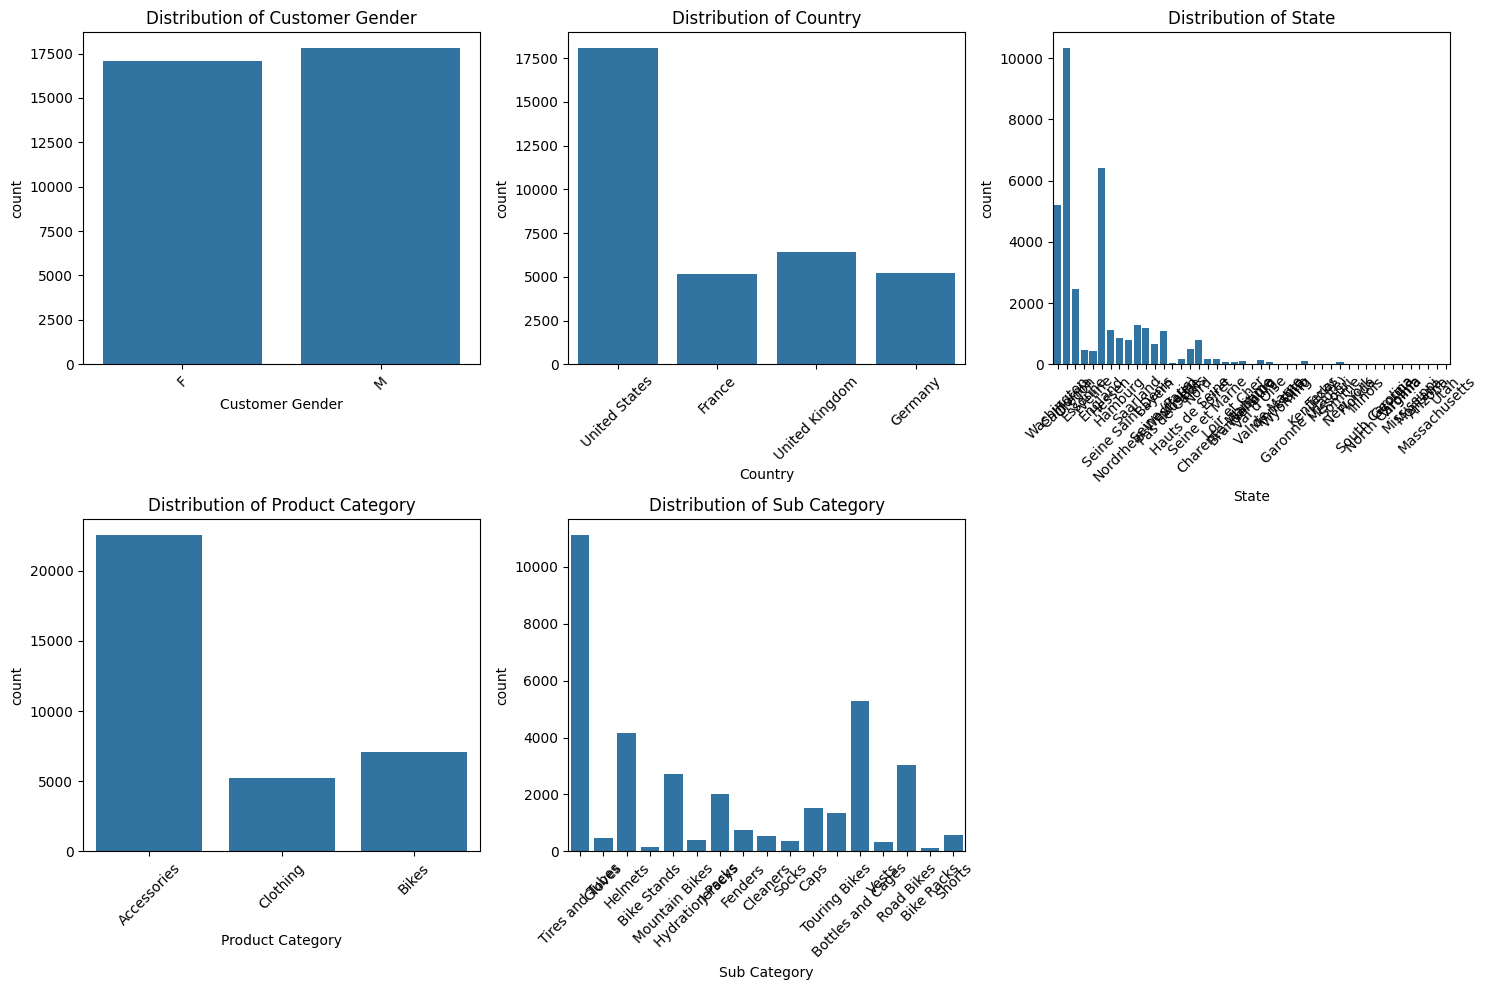

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of categorical variables
categorical_cols = ["Customer Gender", "Country", "State", "Product Category", "Sub Category"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

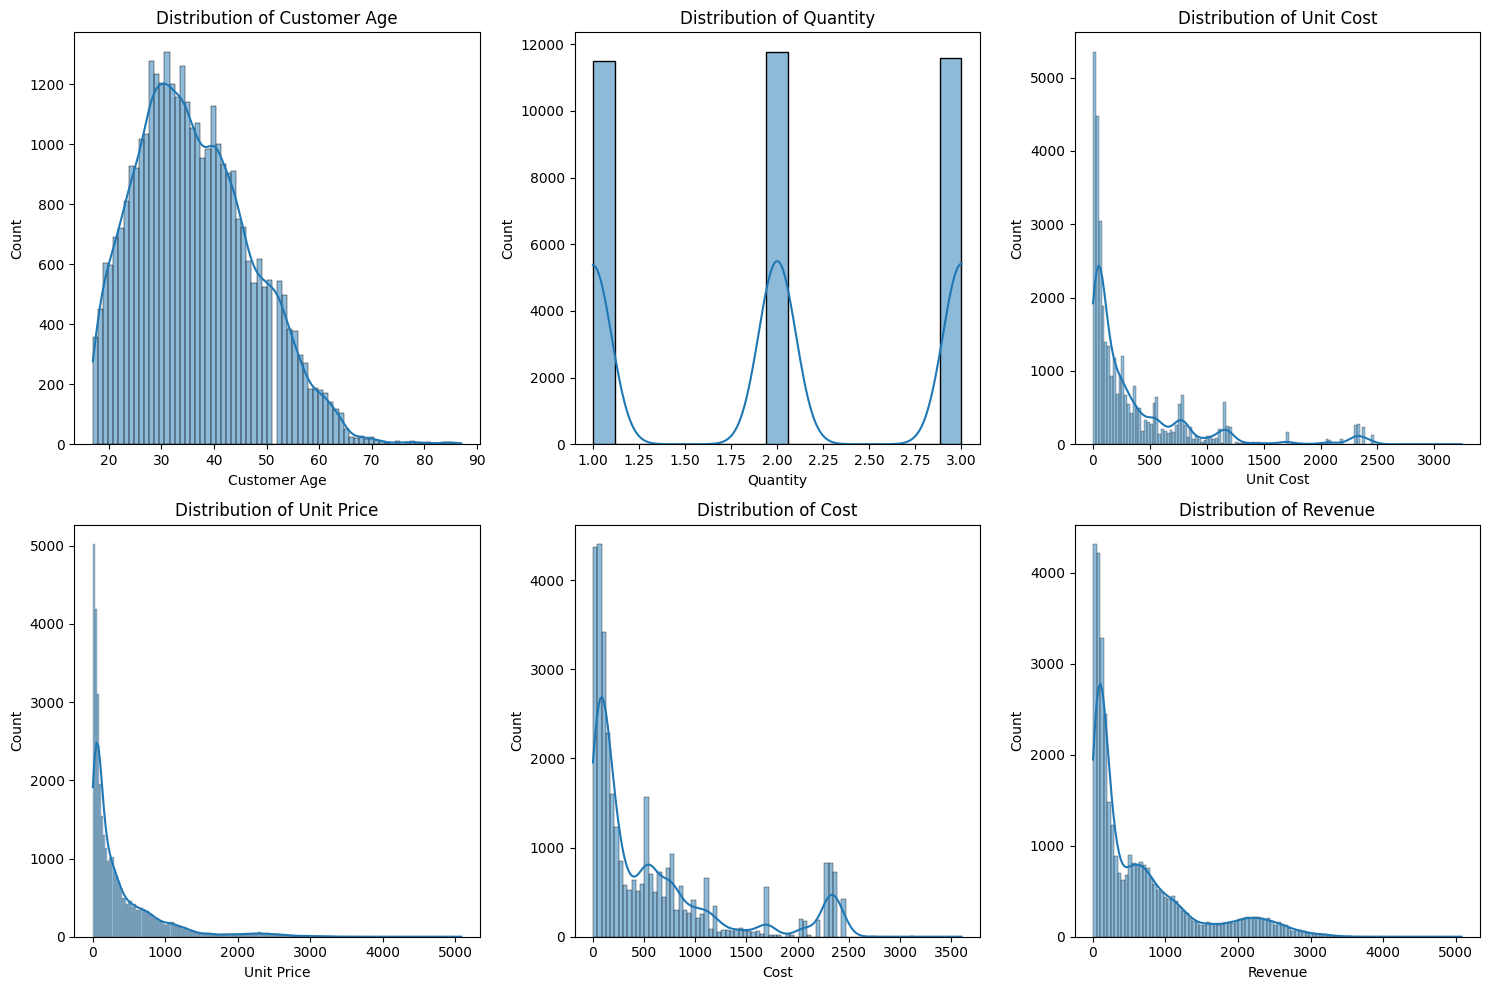

In [8]:
# Histograms for numerical variables
numerical_cols = ["Customer Age", "Quantity", "Unit Cost", "Unit Price", "Cost", "Revenue"]
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

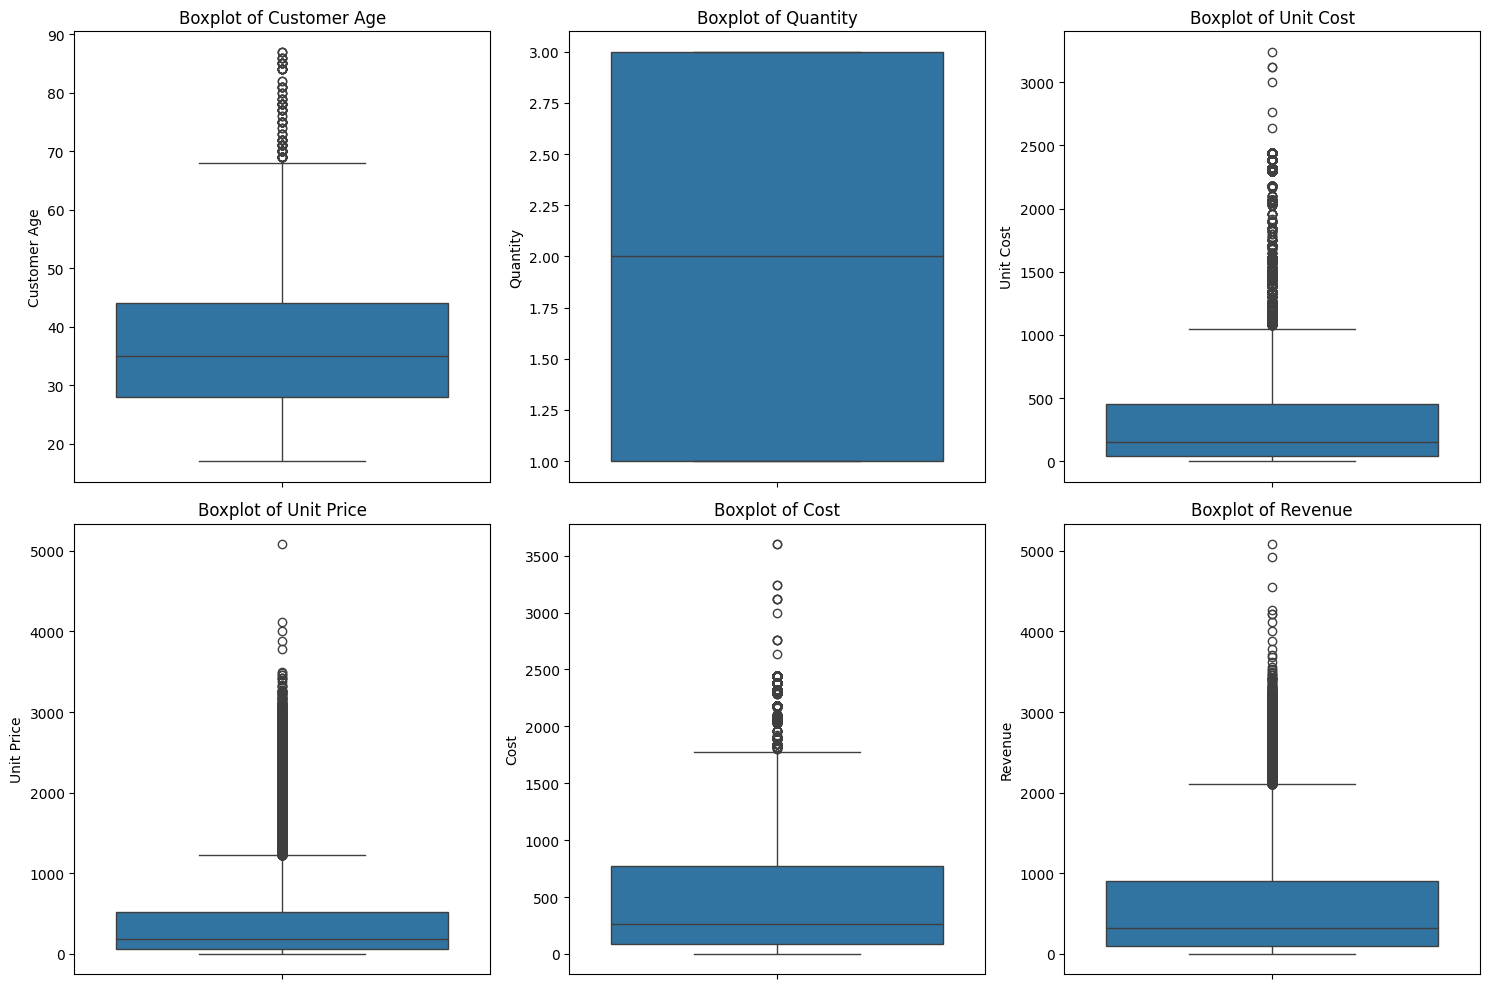

In [9]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

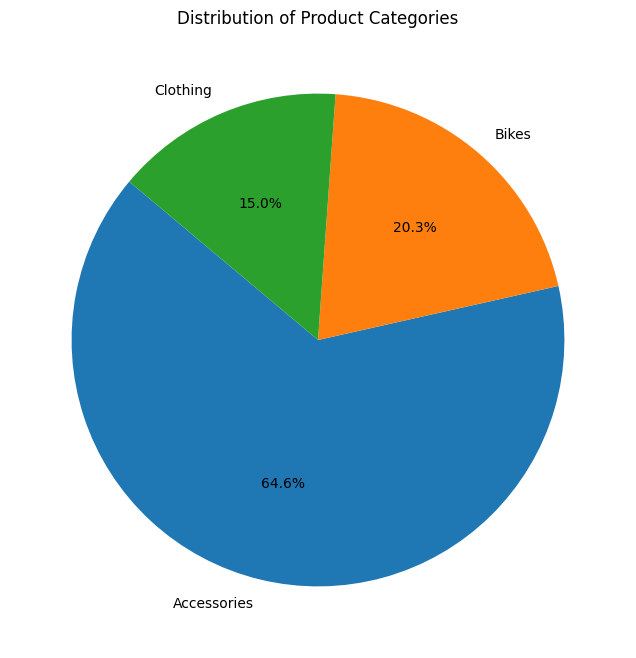

In [10]:
# Pie Chart: Distribution of Product Categories
plt.figure(figsize=(8, 8))
df['Product Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Categories')
plt.ylabel('')
plt.show()

In [11]:
# Cross-tabulations
cross_tab = pd.crosstab(df["Product Category"], df["Sub Category"])
print("Cross-tabulation of Product Category and Sub Category:")
cross_tab


Cross-tabulation of Product Category and Sub Category:


Sub Category,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
Product Category,,,,,,,,,,,,,,,,,
Accessories,103,145,5295,0,545,762,0,4176,396,0,0,0,0,0,11112,0,0
Bikes,0,0,0,0,0,0,0,0,0,0,2737,3022,0,0,0,1334,0
Clothing,0,0,0,1517,0,0,480,0,0,2000,0,0,566,364,0,0,312


In [12]:
# Missing value analysis
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


**<span style="color: blue;">Data Preparation</span>**

**Data Cleaning**

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [14]:
from sklearn.impute import SimpleImputer

# Define columns with missing values
numerical_cols = ["Year", "Customer Age", "Quantity", "Unit Cost", "Unit Price", "Cost"]
categorical_cols = ["Month", "Customer Gender", "Country", "State", "Product Category", "Sub Category"]

# Impute missing values in numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values in categorical columns with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# Drop the "Column1" column due to a large number of missing values
df.drop(columns=['Column1'], inplace=True)

# Impute missing value in "Date" column with the most frequent date
date_imputer = SimpleImputer(strategy='most_frequent')
df['Date'] = date_imputer.fit_transform(df[['Date']])[:, 0]

# Check if there are any remaining missing values
missing_values_after = df.isnull().sum()
print("Missing values after handling:")
print(missing_values_after)


Missing values after handling:
index               0
Date                0
Year                0
Month               0
Customer Age        0
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            0
Unit Cost           0
Unit Price          0
Cost                0
Revenue             0
dtype: int64


In [15]:

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

#Drop the original date column if necessary
df.drop(columns=['Date'], inplace=True)


**Divide data into input and output**

In [16]:
# Input features (X)
X = df.drop(columns=['Product Category'])

# Target variable (y)
y = df['Product Category']

# Print the shapes of X and y to confirm
print("Shape of input features (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of input features (X): (34867, 14)
Shape of target variable (y): (34867,)


**Encoding**

**1. Encode the target column (the labels)**


In [17]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Reshape y to a 2D array (required by OneHotEncoder)
y_reshaped = y.values.reshape(-1, 1)

# Fit and transform the encoder on the target variable
y_encoded = encoder.fit_transform(y_reshaped)

# Convert the encoded sparse matrix to a dense array
y_encoded_array = y_encoded.toarray()

# Print the shape of the encoded target variable
print("Shape of encoded target variable (y_encoded_array):", y_encoded_array.shape)


Shape of encoded target variable (y_encoded_array): (34867, 3)


**2. Encode categorical columns**

In [18]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the categorical columns
X_encoded = encoder.fit_transform(X[categorical_cols])

# Convert the encoded sparse matrix to a dense array
X_encoded_array = X_encoded.toarray()

# Print the shape of the encoded input features
print("Shape of encoded input features (X_encoded_array):", X_encoded_array.shape)


Shape of encoded input features (X_encoded_array): (34867, 68)


In [19]:
# Convert the encoded array to a DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_cols)
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns)

In [20]:
# Reset index of X and X_encoded_df
X.reset_index(drop=True, inplace=True)
X_encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the encoded DataFrame with the remaining numerical columns
X_encoded_final = pd.concat([X, X_encoded_df], axis=1)

# Print the first few rows of the encoded input features
print("Encoded input features:")
X_encoded_final.head()


Encoded input features:


,index,Year,Month,Customer Age,Customer Gender,Country,State,Sub Category,Quantity,Unit Cost,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,0,2016,2,29.0,F,United States,Washington,Tires and Tubes,1.0,80.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,2016,2,29.0,F,United States,Washington,Gloves,2.0,24.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016,2,29.0,F,United States,Washington,Tires and Tubes,3.0,3.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,2016,3,29.0,F,United States,Washington,Tires and Tubes,2.0,87.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,2016,3,29.0,F,United States,Washington,Tires and Tubes,3.0,35.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
encoder = OneHotEncoder()
X_encoded_final_encoded = encoder.fit_transform(X_encoded_final)

X_encoded_final_encoded

<34867x44691 sparse matrix of type '<class 'numpy.float64'>'
	with 2859094 stored elements in Compressed Sparse Row format>

**<span style="color: blue;">Modeling</span>**

**<span style="color: red;">K-Nearest Neighbors (KNN) Algorithm</span>**

In [22]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_final_encoded, y_encoded_array, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn_classifier.predict(X_test)

**Evaluation**

In [23]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9942644106681962


**Classification Report**

In [24]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4513
           1       1.00      1.00      1.00      1456
           2       1.00      0.97      0.98      1005

   micro avg       1.00      0.99      1.00      6974
   macro avg       1.00      0.99      0.99      6974
weighted avg       1.00      0.99      1.00      6974
 samples avg       0.99      0.99      0.99      6974



c:\Users\hp\Desktop\Git_Assignment\Product Prediction Using Machine Learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Confusion Matrix**

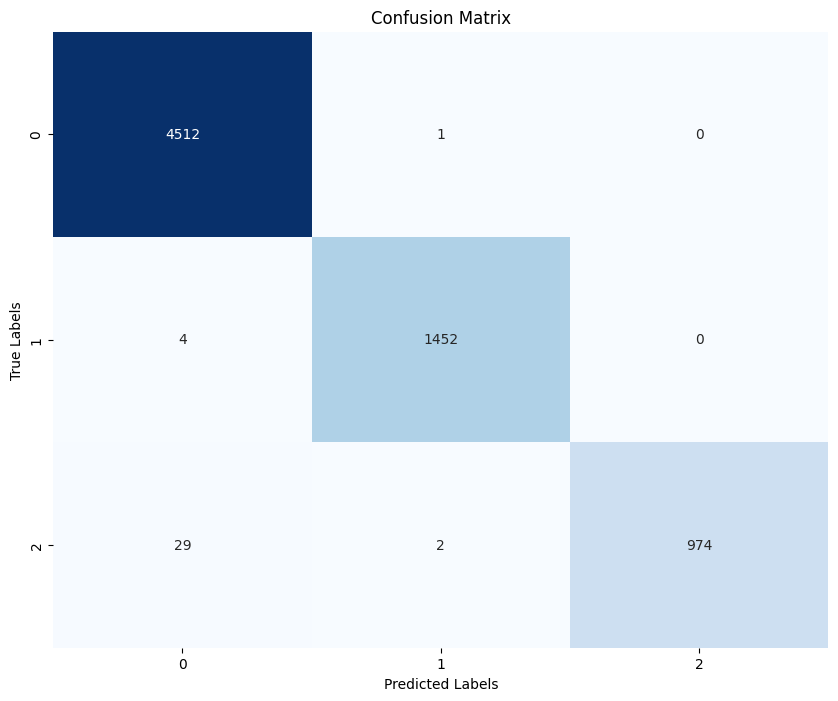

In [25]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**<span style="color: red;">Naive Bayes algorithm</span>**

In [26]:

from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train.argmax(axis=1))  # Note: Naive Bayes doesn't support multilabel format

# Predict the labels for test set
y_pred_nb = naive_bayes_classifier.predict(X_test)


**Evaluation**

In [27]:
# Evaluate the classifier
accuracy_nb = accuracy_score(y_test.argmax(axis=1), y_pred_nb)
print("Accuracy:", accuracy_nb)


Accuracy: 1.0


**Classification Report**

In [28]:
# Classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4513
           1       1.00      1.00      1.00      1456
           2       1.00      1.00      1.00      1005

    accuracy                           1.00      6974
   macro avg       1.00      1.00      1.00      6974
weighted avg       1.00      1.00      1.00      6974



**Confusion Matrix**

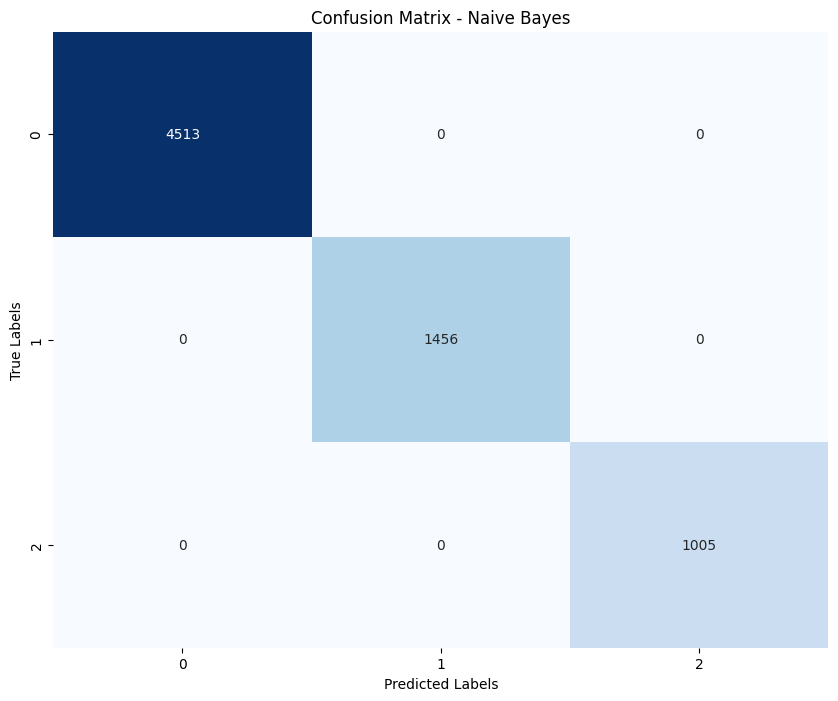

In [29]:
# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test.argmax(axis=1), y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**<span style="color: red;">Decision Tree classifier</span>**

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier
decision_tree_classifier.fit(X_train, y_train.argmax(axis=1))

# Predict the labels for test set
y_pred_dt = decision_tree_classifier.predict(X_test)



**Evaluation**

In [31]:
# Evaluate the classifier
accuracy_dt = accuracy_score(y_test.argmax(axis=1), y_pred_dt)
print("Accuracy:", accuracy_dt)


Accuracy: 1.0


**Classification Report**

In [32]:
# Classification report
print("Classification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred_dt))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4513
           1       1.00      1.00      1.00      1456
           2       1.00      1.00      1.00      1005

    accuracy                           1.00      6974
   macro avg       1.00      1.00      1.00      6974
weighted avg       1.00      1.00      1.00      6974



**Confusion Matrix**

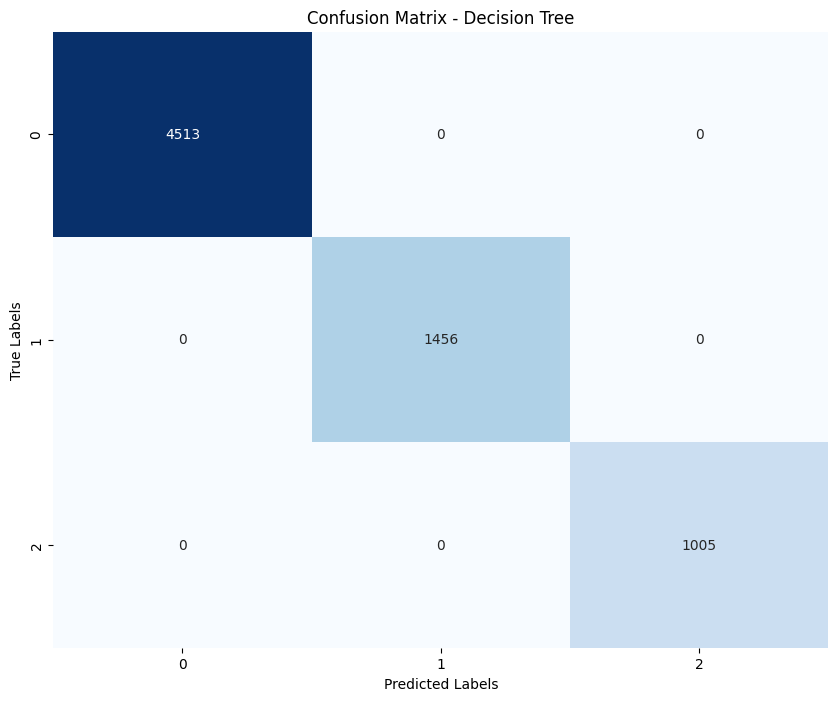

In [33]:
# Compute confusion matrix
conf_matrix_dt = confusion_matrix(y_test.argmax(axis=1), y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()